In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
BATCH_SIZE = 64
TEST_BATCH_SIZE = 1000
EPOCHS = 14
LR = 0.001
LOG_INTERVAL = 10
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [59]:
class MNIST_Polygon(datasets.MNIST):
    
    def __init__(self, path, train=True, download=False, pixels=0):
        super().__init__(root=path, train=train, download=download)
        
        data = self.data.view(-1, 784)
        data = list(data.unbind())
        data = [torch.arange(784)[(x > 0.8)] for x in data]
        lengths = [len(x) for x in data]
        max_length = max(lengths)
        data = [torch.Tensor(list(x) + (351 - len(x)) * [0]) for x in data]
        data = torch.stack(data).contiguous()
        
        if pixels == 0:
            self.data = torch.reshape(data, (len(data) , 1, 351))
            
        else:
            data = [x[x != 0] for x in data]
            data = [torch.cat((x[(x+pixels)%28 >= pixels] + pixels, torch.zeros(351 - len(x[(x+pixels)%28 >= pixels])))) for x in data]
            data = torch.stack(data).contiguous()
            self.data = torch.reshape(data, (len(data) , 1, 351))
            
        self.max_length = max_length   
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y
        
    def right_shift(self, pixels):
        temp_data = [x[x != 0] for x in self.data]
        [torch.cat((x[(x+pixels)%28 >= pixels] + pixels, torch.zeros(351 - len(x[(x+pixels)%28 >= pixels])))) for x in temp_data]
        self.data = torch.stack(data).contiguous()
        
        
    @property
    def raw_folder(self):
        return os.path.join(self.root, 'MNIST', 'raw')

    @property
    def processed_folder(self):
        return os.path.join(self.root, 'MNIST', 'processed')
    



In [84]:
dataset1 = MNIST_Polygon('~/Developer/datasets', train=True, pixels=0)
dataset2 = MNIST_Polygon('~/Developer/datasets', train=False, pixels=2)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=TEST_BATCH_SIZE)

In [29]:
a = dataset1.data[:,0]
torch.cat([a // 28, a % 28], -1).shape


torch.Size([60000, 702])

In [164]:
pixels = 15
temp_data = [x[x != 0] for x in dataset1.data]
[torch.cat((x[(x+pixels)%28 >= pixels] + pixels, torch.zeros(351 - len(x[(x+pixels)%28 >= pixels])))) for x in temp_data]

[tensor([192., 193., 194., 195., 219., 220., 221., 222., 223., 247., 248., 249.,
         250., 251., 276., 277., 278., 279., 305., 306., 307., 335., 363., 586.,
         587., 612., 613., 614., 615., 638., 639., 640., 641., 642., 643., 664.,
         665., 666., 667., 668., 669., 670., 671., 692., 693., 694., 695., 696.,
         697., 698., 699.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

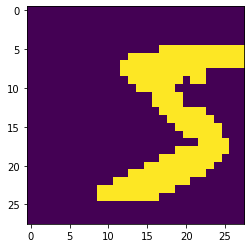

In [63]:
matrix = np.zeros(28*28)

for a in dataset1.data[0][0]:
    if a == 0:
        break
    np.put(matrix, a, 1)

matrix = np.reshape(matrix, (28,28))
plt.imshow(matrix)

In [54]:
pixels = 15
56%28 >= pixel

#[torch.cat((x[x >= pixels] + pixels, torch.zeros(351 - len(x[x >= pixels])))) for x in dataset1.data[0]]

for x in dataset1.data:
    y = x[0]
    print(x)
    y = x[x%28 >= pixels] +pixels
    break


torch.cat((y, torch.zeros(351 - len(x[x >= pixels]))))
matrix = np.reshape(matrix, (28,28))
plt.imshow(matrix)

tensor([[152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
         176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
         188., 189., 190., 191., 203., 204., 205., 206., 207., 208., 209., 210.,
         211., 212., 213., 214., 215., 216., 217., 218., 231., 232., 233., 234.,
         235., 236., 237., 238., 239., 240., 241., 260., 261., 262., 263., 264.,
         265., 266., 268., 269., 289., 290., 291., 292., 293., 319., 320., 321.,
         322., 347., 348., 349., 350., 376., 377., 378., 379., 380., 381., 405.,
         406., 407., 408., 409., 410., 434., 435., 436., 437., 438., 439., 463.,
         464., 465., 466., 467., 493., 494., 495., 496., 518., 519., 520., 521.,
         522., 523., 524., 544., 545., 546., 547., 548., 549., 550., 551., 570.,
         571., 572., 573., 574., 575., 576., 577., 578., 596., 597., 598., 599.,
         600., 601., 602., 603., 604., 605., 622., 623., 624., 625., 626., 627.,
         628., 629., 630., 6

In [89]:
class SimpleModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(351, 512, bias=False),
            nn.BatchNorm1d(512),
            nn.ReLU(True),
            nn.Linear(512, 256, bias=False), 
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        return self.net(x[:, 0])

In [72]:
class SimpleModel2dFair(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(702, 324, bias=False),
            nn.BatchNorm1d(324),
            nn.ReLU(True),
            nn.Linear(324, 256, bias=False), 
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        x = x[:, 0]
        x = torch.cat([x // 28, x % 28], -1)
        return self.net(x)

In [73]:
class SimpleModel2d(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(702, 512, bias=False),
            nn.BatchNorm1d(512),
            nn.ReLU(True),
            nn.Linear(512, 256, bias=False), 
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        x = x[:, 0]
        x = torch.cat([x // 28, x % 28], -1)
        return self.net(x)

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, 5),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, 5),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.25)
        )
        
        self.linear = nn.Sequential(
            nn.Linear(10944, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )


    def forward(self, x):
        x = self.conv(x)
        x = torch.flatten(x, 1)
        return self.linear(x)



In [90]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    criterion = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()), end="\r")


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# SimpleModel

In [91]:
model = SimpleModel().to(DEVICE)
summary(model, (1, 351))
optimizer = optim.Adam(model.parameters(), lr=LR)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         179,712
       BatchNorm1d-2                  [-1, 512]           1,024
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,072
       BatchNorm1d-5                  [-1, 256]             512
              ReLU-6                  [-1, 256]               0
            Linear-7                   [-1, 10]           2,570
Total params: 314,890
Trainable params: 314,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.20
Estimated Total Size (MB): 1.22
----------------------------------------------------------------


In [92]:
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.541990
Test set: Average loss: 1.3260, Accuracy: 5574/10000 (55.7%)

Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.507069
Test set: Average loss: 1.0109, Accuracy: 6609/10000 (66.1%)

Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.476440
Test set: Average loss: 0.9698, Accuracy: 6771/10000 (67.7%)

Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.436854
Test set: Average loss: 0.9382, Accuracy: 6856/10000 (68.6%)

Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.414983
Test set: Average loss: 0.8816, Accuracy: 6967/10000 (69.7%)

Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.398298
Test set: Average loss: 0.8146, Accuracy: 7143/10000 (71.4%)

Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.377806
Test set: Average loss: 0.7919, Accuracy: 7189/10000 (71.9%)

Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.381165
Test set: Average loss: 0.7789, Accuracy: 7274/10000 (72.7%)

Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.361296
Test set: Average loss: 0.7617, Accuracy: 7328/10000 (

# SimpleModel2dFair

In [74]:
model = SimpleModel2dFair().to(DEVICE)
summary(model, (1, 351))
optimizer = optim.Adam(model.parameters(), lr=LR)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 324]         227,448
       BatchNorm1d-2                  [-1, 324]             648
              ReLU-3                  [-1, 324]               0
            Linear-4                  [-1, 256]          82,944
       BatchNorm1d-5                  [-1, 256]             512
              ReLU-6                  [-1, 256]               0
           Dropout-7                  [-1, 256]               0
            Linear-8                   [-1, 10]           2,570
Total params: 314,122
Trainable params: 314,122
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.20
Estimated Total Size (MB): 1.21
----------------------------------------------------------------


In [75]:
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.265979
Test set: Average loss: 0.9797, Accuracy: 6802/10000 (68.0%)

Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.176112
Test set: Average loss: 0.6334, Accuracy: 7839/10000 (78.4%)

Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.073552
Test set: Average loss: 0.5423, Accuracy: 8230/10000 (82.3%)

Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.034744
Test set: Average loss: 0.4555, Accuracy: 8465/10000 (84.7%)

Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.036638
Test set: Average loss: 0.4465, Accuracy: 8545/10000 (85.5%)

Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.034099
Test set: Average loss: 0.3913, Accuracy: 8750/10000 (87.5%)

Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.032402
Test set: Average loss: 0.3843, Accuracy: 8755/10000 (87.5%)

Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.025322
Test set: Average loss: 0.3618, Accuracy: 8839/10000 (88.4%)

Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.025139
Test set: Average loss: 0.3665, Accuracy: 8828/10000 (

# SimpleModel2d

In [156]:
model = SimpleModel2d().to(DEVICE)
summary(model, (1, 351))
optimizer = optim.Adam(model.parameters(), lr=LR)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         359,424
       BatchNorm1d-2                  [-1, 512]           1,024
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,072
       BatchNorm1d-5                  [-1, 256]             512
              ReLU-6                  [-1, 256]               0
            Linear-7                   [-1, 10]           2,570
Total params: 494,602
Trainable params: 494,602
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.89
Estimated Total Size (MB): 1.91
----------------------------------------------------------------


In [157]:
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.150827
Test set: Average loss: 0.7881, Accuracy: 7285/10000 (72.8%)

Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.090389
Test set: Average loss: 0.5165, Accuracy: 8294/10000 (82.9%)

Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.073568
Test set: Average loss: 0.4582, Accuracy: 8518/10000 (85.2%)

Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.054653
Test set: Average loss: 0.4268, Accuracy: 8638/10000 (86.4%)

Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.042292
Test set: Average loss: 0.4072, Accuracy: 8689/10000 (86.9%)

Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.026620
Test set: Average loss: 0.4071, Accuracy: 8691/10000 (86.9%)

Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.023142
Test set: Average loss: 0.3954, Accuracy: 8810/10000 (88.1%)

Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.018960
Test set: Average loss: 0.4088, Accuracy: 8771/10000 (87.7%)

Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.006144
Test set: Average loss: 0.4212, Accuracy: 8794/10000 (

In [38]:
model = Net().to(DEVICE)
summary(model, (1, 351))
optimizer = optim.Adam(model.parameters(), lr=LR)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 347]             192
       BatchNorm1d-2              [-1, 32, 347]              64
              ReLU-3              [-1, 32, 347]               0
            Conv1d-4              [-1, 64, 343]          10,304
       BatchNorm1d-5              [-1, 64, 343]             128
              ReLU-6              [-1, 64, 343]               0
         MaxPool1d-7              [-1, 64, 171]               0
           Dropout-8              [-1, 64, 171]               0
            Linear-9                  [-1, 128]       1,400,960
             ReLU-10                  [-1, 128]               0
          Dropout-11                  [-1, 128]               0
           Linear-12                   [-1, 10]           1,290
Total params: 1,412,938
Trainable params: 1,412,938
Non-trainable params: 0
---------------------------

In [39]:
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.872126
Test set: Average loss: 0.9270, Accuracy: 6856/10000 (68.6%)

Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.944904
Test set: Average loss: 1.0940, Accuracy: 6427/10000 (64.3%)

Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.585725
Test set: Average loss: 1.5268, Accuracy: 5580/10000 (55.8%)

Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.432265
Test set: Average loss: 0.5807, Accuracy: 8085/10000 (80.8%)

Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.501121
Test set: Average loss: 0.6541, Accuracy: 7878/10000 (78.8%)

Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.332885
Test set: Average loss: 0.6078, Accuracy: 7997/10000 (80.0%)

Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.337002
Test set: Average loss: 0.5073, Accuracy: 8250/10000 (82.5%)

Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.368070
Test set: Average loss: 0.4895, Accuracy: 8359/10000 (83.6%)

Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.248462
Test set: Average loss: 0.4687, Accuracy: 8432/10000 (